# Proyek Analisis Data: Bike Sharing Dataset
- **Nama:** Tazky Khumaira Tsany
- **Email:** mc589d5x2489@student.devacademy.id
- **ID Dicoding:** MC589D5X2489

## Menentukan Pertanyaan Bisnis

1. Bagaimana pengaruh musim terhadap jumlah penyewaan sepeda di Washington D.C. selama dua tahun tersebut?
2.  Bagaimana  jumlah penyewaan sepeda di Washington D.C. selama satu bulan pada hari kerja?

## Import Semua Packages/Library yang Digunakan

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import plotly.express as px

## Data Wrangling

### Gathering Data
Pada Gathering data ditampilkan terlebih tahulu lalu ditampilkan dengan beberapa baris dari data set hour.csv dan day.csv

In [44]:
import pandas as pd

hour_df = pd.read_csv('/content/hour.csv')
day_df = pd.read_csv('/content/day.csv')

print("\nLima baris pertama dataset Hour:")
print(hour_df.head())
print("\nLima baris pertama dataset Day:")
print(day_df.head())


Lima baris pertama dataset Hour:
   instant      dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1   0        0        6           0   
1        2  2011-01-01       1   0     1   1        0        6           0   
2        3  2011-01-01       1   0     1   2        0        6           0   
3        4  2011-01-01       1   0     1   3        0        6           0   
4        5  2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Lima baris pertama dataset Day:
   instant      dteday  season  

### Assessing Data

In [45]:
# Menampilkan informasi data set hour dan day
print("Informasi Dataset Hour:")
print(hour_df.info())
print("\nInformasi Dataset Day:")
print(day_df.info())

Informasi Dataset Hour:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB
None

Informasi Dataset D

In [46]:
# Memeriksa nilai yang hilang
print("\nCek nilai yang hilang di dataset Hour:")
print(hour_df.isnull().sum())
print("\nCek nilai yang hilang di dataset Day:")
print(day_df.isnull().sum())


Cek nilai yang hilang di dataset Hour:
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Cek nilai yang hilang di dataset Day:
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [47]:
# Memeriksa nilai duplikat
print("\nJumlah nilai duplikat di dataset Hour:")
print(hour_df.duplicated().sum())
print("\nJumlah nilai duplikat di dataset Day:")
print(day_df.duplicated().sum())


Jumlah nilai duplikat di dataset Hour:
0

Jumlah nilai duplikat di dataset Day:
0


### Cleaning Data

In [48]:
# Mengonversi kolom 'dteday' ke tipe data datetime
hour_df['dteday'] = pd.to_datetime(hour_df['dteday'])
day_df['dteday'] = pd.to_datetime(day_df['dteday'])

# Menampilkan hasil
print("\nDataset Hour setelah mengonversi 'dteday' ke datetime:")
print(hour_df.head())
print("\nDataset Day setelah mengonversi 'dteday' ke datetime:")
print(day_df.head())



Dataset Hour setelah mengonversi 'dteday' ke datetime:
   instant     dteday  season  yr  mnth  hr  holiday  weekday  workingday  \
0        1 2011-01-01       1   0     1   0        0        6           0   
1        2 2011-01-01       1   0     1   1        0        6           0   
2        3 2011-01-01       1   0     1   2        0        6           0   
3        4 2011-01-01       1   0     1   3        0        6           0   
4        5 2011-01-01       1   0     1   4        0        6           0   

   weathersit  temp   atemp   hum  windspeed  casual  registered  cnt  
0           1  0.24  0.2879  0.81        0.0       3          13   16  
1           1  0.22  0.2727  0.80        0.0       8          32   40  
2           1  0.22  0.2727  0.80        0.0       5          27   32  
3           1  0.24  0.2879  0.75        0.0       3          10   13  
4           1  0.24  0.2879  0.75        0.0       0           1    1  

Dataset Day setelah mengonversi 'dteday' ke date

In [49]:
# Memisahkan kolom numerik dan kategorikal
numeric_columns = hour_df.select_dtypes(include=['number']).columns
categorical_columns = hour_df.select_dtypes(include=['category']).columns

# Mengisi nilai yang hilang untuk kolom numerik dengan rata-rata
hour_df[numeric_columns] = hour_df[numeric_columns].fillna(hour_df[numeric_columns].mean())

# Untuk day_df
numeric_columns_day = day_df.select_dtypes(include=['number']).columns
categorical_columns_day = day_df.select_dtypes(include=['category']).columns

# Mengisi nilai yang hilang untuk kolom numerik dengan rata-rata
day_df[numeric_columns_day] = day_df[numeric_columns_day].fillna(day_df[numeric_columns_day].mean())

# Menampilkan hasil
print("\nDataset Hour setelah mengisi nilai yang hilang (numerik):")
print(hour_df.isnull().sum())
print("\nDataset Day setelah mengisi nilai yang hilang (numerik):")
print(day_df.isnull().sum())



Dataset Hour setelah mengisi nilai yang hilang (numerik):
instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Dataset Day setelah mengisi nilai yang hilang (numerik):
instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64


In [50]:
# Menghapus duplikat
hour_df.drop_duplicates(inplace=True)
day_df.drop_duplicates(inplace=True)

# Menampilkan hasil
print("\nDataset Hour setelah menghapus duplikat:")
print(hour_df.duplicated().sum())  # Mengecek jumlah duplikat
print("\nDataset Day setelah menghapus duplikat:")
print(day_df.duplicated().sum())  # Mengecek jumlah duplikat



Dataset Hour setelah menghapus duplikat:
0

Dataset Day setelah menghapus duplikat:
0


In [51]:
# Mengubah kolom kategori seperti 'season', 'weathersit', 'weekday' menjadi tipe data kategorikal
hour_df['season'] = hour_df['season'].astype('category')
hour_df['weathersit'] = hour_df['weathersit'].astype('category')
hour_df['weekday'] = hour_df['weekday'].astype('category')
hour_df['workingday'] = hour_df['workingday'].astype('category')

day_df['season'] = day_df['season'].astype('category')
day_df['weathersit'] = day_df['weathersit'].astype('category')
day_df['weekday'] = day_df['weekday'].astype('category')
day_df['workingday'] = day_df['workingday'].astype('category')

# Menampilkan hasil
print("\nDataset Hour setelah mengubah kolom menjadi kategorikal:")
print(hour_df.dtypes)
print("\nDataset Day setelah mengubah kolom menjadi kategorikal:")
print(day_df.dtypes)



Dataset Hour setelah mengubah kolom menjadi kategorikal:
instant                int64
dteday        datetime64[ns]
season              category
yr                     int64
mnth                   int64
hr                     int64
holiday                int64
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

Dataset Day setelah mengubah kolom menjadi kategorikal:
instant                int64
dteday        datetime64[ns]
season              category
yr                     int64
mnth                   int64
holiday                int64
weekday             category
workingday          category
weathersit          category
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
c

In [52]:
# Menambahkan kolom 'year', 'month', dan 'day' yang diambil dari kolom 'dteday'
hour_df['year'] = hour_df['dteday'].dt.year
hour_df['month'] = hour_df['dteday'].dt.month
hour_df['day'] = hour_df['dteday'].dt.day
hour_df['hour'] = hour_df['dteday'].dt.hour

day_df['year'] = day_df['dteday'].dt.year
day_df['month'] = day_df['dteday'].dt.month
day_df['day'] = day_df['dteday'].dt.day

# Menampilkan hasil
print("\nDataset Hour setelah menambahkan kolom 'year', 'month', 'day', dan 'hour':")
print(hour_df.head())
print("\nDataset Day setelah menambahkan kolom 'year', 'month', dan 'day':")
print(day_df.head())



Dataset Hour setelah menambahkan kolom 'year', 'month', 'day', dan 'hour':
   instant     dteday season  yr  mnth  hr  holiday weekday workingday  \
0        1 2011-01-01      1   0     1   0        0       6          0   
1        2 2011-01-01      1   0     1   1        0       6          0   
2        3 2011-01-01      1   0     1   2        0       6          0   
3        4 2011-01-01      1   0     1   3        0       6          0   
4        5 2011-01-01      1   0     1   4        0       6          0   

  weathersit  ...   atemp   hum  windspeed  casual  registered  cnt  year  \
0          1  ...  0.2879  0.81        0.0       3          13   16  2011   
1          1  ...  0.2727  0.80        0.0       8          32   40  2011   
2          1  ...  0.2727  0.80        0.0       5          27   32  2011   
3          1  ...  0.2879  0.75        0.0       3          10   13  2011   
4          1  ...  0.2879  0.75        0.0       0           1    1  2011   

   month  day  h

In [53]:
# Menampilkan informasi dataset setelah data wrangling
print("\nInformasi Dataset Hour Setelah Data Wrangling:")
print(hour_df.info())
print("\nInformasi Dataset Day Setelah Data Wrangling:")
print(day_df.info())



Informasi Dataset Hour Setelah Data Wrangling:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  category      
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  category      
 8   workingday  17379 non-null  category      
 9   weathersit  17379 non-null  category      
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-

## Exploratory Data Analysis (EDA)

### Explore ...

<ipython-input-55-9baa16269eba>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  seasonal_rentals = hour_df.groupby('season')['cnt'].sum().reset_index() # Changed df to hour_df and count to cnt


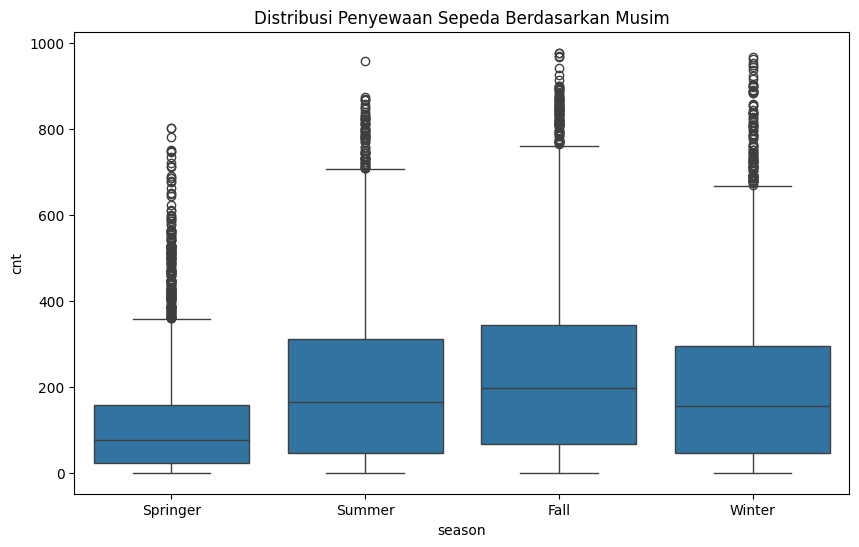

In [55]:
# Agregasi berdasarkan musim
seasonal_rentals = hour_df.groupby('season')['cnt'].sum().reset_index() # Changed df to hour_df and count to cnt

# Visualisasi boxplot untuk musim
plt.figure(figsize=(10, 6))
sns.boxplot(x='season', y='cnt', data=hour_df) # Changed df to hour_df and count to cnt
plt.title('Distribusi Penyewaan Sepeda Berdasarkan Musim')

# Menambahkan label musim
plt.xticks([0, 1, 2, 3], ['Springer', 'Summer', 'Fall', 'Winter'])  # Mengubah label sumbu x

plt.show()

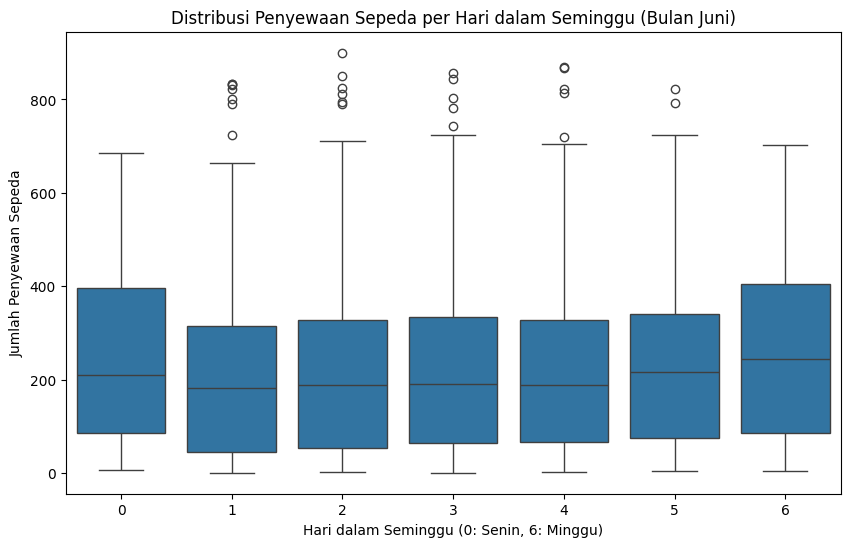

In [42]:
# Filter data untuk bulan tertentu (misalnya bulan Juni, bulan ke-6)
filtered_month_df = hour_df[hour_df['month'] == 6]  # Ganti '6' dengan bulan yang diinginkan

# Visualisasi boxplot untuk jumlah penyewaan sepeda per hari dalam seminggu
plt.figure(figsize=(10, 6))
sns.boxplot(x='weekday', y='cnt', data=filtered_month_df)
plt.title('Distribusi Penyewaan Sepeda per Hari dalam Seminggu (Bulan Juni)')
plt.xlabel('Hari dalam Seminggu (0: Senin, 6: Minggu)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.show()

## Visualization & Explanatory Analysis

### Pertanyaan 1:.Apa pengaruh musim terhadap jumlah penyewaan sepeda di Washington D.C. selama dua tahun tersebut?

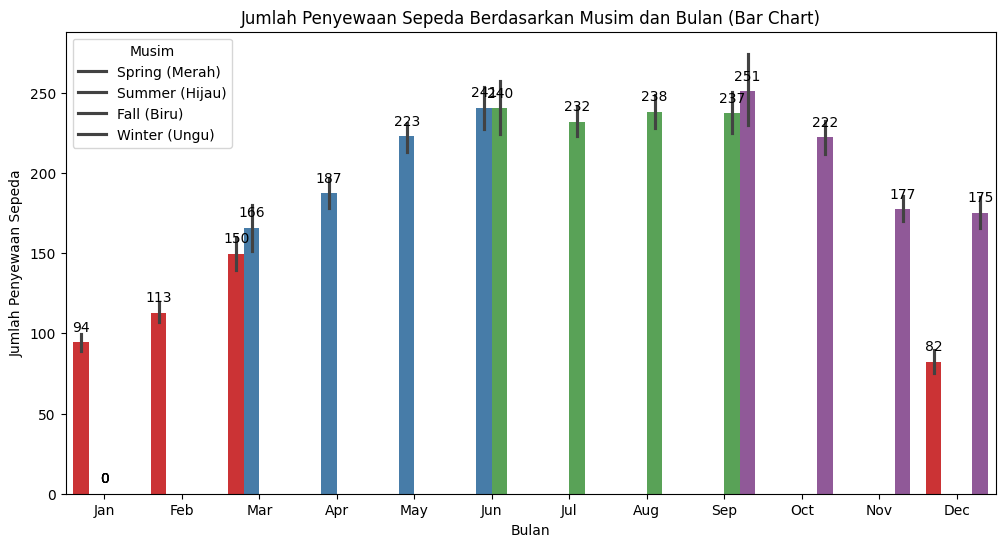

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi tren penyewaan sepeda berdasarkan musim dan bulan menggunakan bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=hour_df, x='month', y='cnt', hue='season', palette='Set1')

# Menambahkan judul dan label
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Musim dan Bulan (Bar Chart)')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan Sepeda')

# Menambahkan label musim di sumbu X
plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

# Menambahkan anotasi musim di atas setiap bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.text(p.get_x() + p.get_width() / 2., height + 5, f'{height:.0f}', ha='center', va='bottom')

# Update legenda dengan deskripsi musim
plt.legend(title='Musim', labels=['Spring (Merah)', 'Summer (Hijau)', 'Fall (Biru)', 'Winter (Ungu)'])

# Tampilkan grafik
plt.show()


### Pertanyaan 2 : Bagaimana  jumlah penyewaan sepeda di Washington D.C. selama satu bulan pada hari kerja?

<ipython-input-25-13bf5d0d8d4c>:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=filtered_month_df, palette='Set2', ci=None)
<ipython-input-25-13bf5d0d8d4c>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='workingday', y='cnt', data=filtered_month_df, palette='Set2', ci=None)


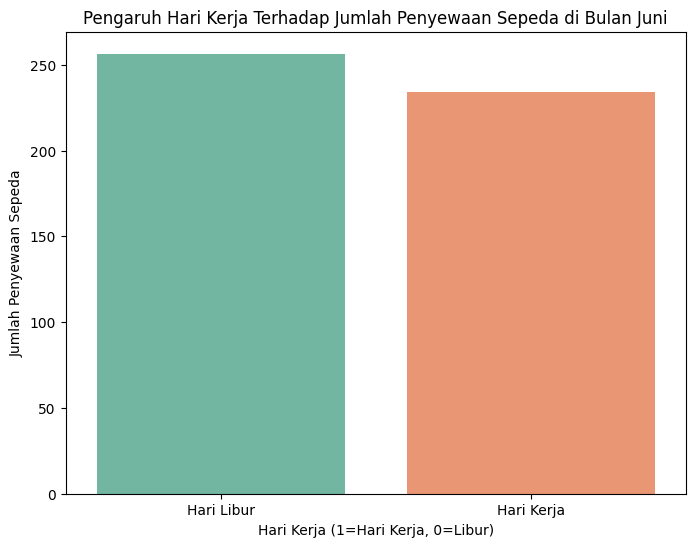

<ipython-input-25-13bf5d0d8d4c>:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_month_df, x='weekday', y='cnt', hue='workingday', palette='Set1', ci=None)


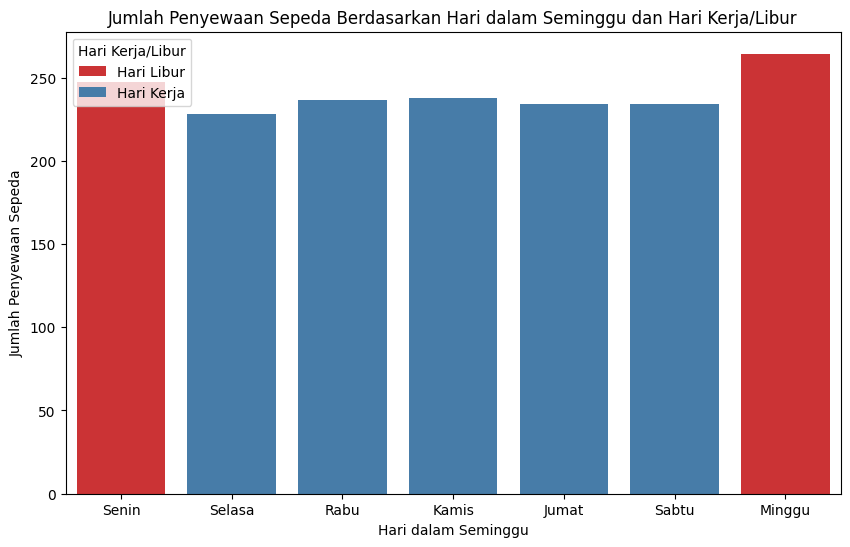

Rata-rata penyewaan sepeda pada hari kerja: 234.2296511627907
Rata-rata penyewaan sepeda pada hari libur: 256.41421568627453


In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data untuk bulan tertentu (misalnya bulan Juni, bulan ke-6)
filtered_month_df = hour_df[hour_df['month'] == 6]  # Gantilah '6' dengan bulan yang diinginkan

# Visualisasi bar chart untuk membandingkan penyewaan sepeda pada hari kerja dan libur
plt.figure(figsize=(8, 6))
sns.barplot(x='workingday', y='cnt', data=filtered_month_df, palette='Set2', ci=None)
plt.title('Pengaruh Hari Kerja Terhadap Jumlah Penyewaan Sepeda di Bulan Juni')
plt.xlabel('Hari Kerja (1=Hari Kerja, 0=Libur)')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.xticks([0, 1], ['Hari Libur', 'Hari Kerja'])
plt.show()

# Visualisasi bar chart untuk tren penyewaan sepeda berdasarkan hari dalam seminggu dan hari kerja/libur
plt.figure(figsize=(10, 6))
sns.barplot(data=filtered_month_df, x='weekday', y='cnt', hue='workingday', palette='Set1', ci=None)
plt.title('Jumlah Penyewaan Sepeda Berdasarkan Hari dalam Seminggu dan Hari Kerja/Libur')
plt.xlabel('Hari dalam Seminggu')
plt.ylabel('Jumlah Penyewaan Sepeda')
plt.legend(title='Hari Kerja/Libur', labels=['Hari Libur', 'Hari Kerja'])
plt.xticks([0, 1, 2, 3, 4, 5, 6], ['Senin', 'Selasa', 'Rabu', 'Kamis', 'Jumat', 'Sabtu', 'Minggu'])
plt.show()

# Menghitung rata-rata penyewaan sepeda untuk hari kerja dan libur
avg_workingday = filtered_month_df[filtered_month_df['workingday'] == 1]['cnt'].mean()
avg_weekend = filtered_month_df[filtered_month_df['workingday'] == 0]['cnt'].mean()

# Menampilkan rata-rata penyewaan sepeda untuk hari kerja dan hari libur
print(f'Rata-rata penyewaan sepeda pada hari kerja: {avg_workingday}')
print(f'Rata-rata penyewaan sepeda pada hari libur: {avg_weekend}')


## Conclusion

- Kesimpulan dari Pertanyaan 1: Pada grafik menunjukkan bahwa penyewaan sepeda mencapai puncaknya selama musim panas (Summer), dengan angka tertinggi yang tercatat pada bulan Juni dan September. Di bulan-bulan tersebut, jumlah penyewaan sepeda mencapai lebih dari 240 unit per bulan. Hal ini mengindikasikan bahwa cuaca yang lebih hangat mendukung penggunaan sepeda secara aktif, baik untuk kegiatan maupun  transportasi sehari-hari.




- Kesimpulan pertanyaan 2: Pada Grafik nomor 2 menunjukkan perbandingan jumlah penyewaan sepeda antara hari kerja dan hari libur selama satu bulan. Penyewaan sepeda terlihat lebih tinggi pada hari libur (terutama pada Minggu), dengan angka lebih dari 250 penyewaan. Sebaliknya, hari kerja menunjukkan angka penyewaan yang relatif lebih rendah dan konsisten sepanjang minggu, dengan puncak penyewaan pada Senin hingga Jumat yang berada di kisaran 200-220 penyewaan.

In [57]:
from google.colab import files
import pandas as pd

df_to_download = hour_df
df_to_download.to_csv('ProyekAnalisisData.csv', index=False)
files.download('ProyekAnalisisData.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>